In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Flight_Cleaned_Nov24.csv', error_bad_lines=False, low_memory=False)

In [5]:
df.head()

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_BLK,DISTANCE,TOTAL_DELAY
0,1,7,WN,ATL,HOU,2200-2259,696,0
1,1,1,OO,DTW,SYR,0700-0759,374,0
2,1,1,DL,ATL,MDW,2000-2059,591,0
3,1,5,UA,TPA,IAH,1800-1859,787,0
4,1,1,OO,SEA,PDX,0600-0659,129,0


In [6]:
df = df[['MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK', 'DISTANCE', 'TOTAL_DELAY']]

In [7]:
df.shape

(707103, 8)

In [8]:
df.shape

(707103, 8)

In [9]:
df.dropna(axis = 0, inplace = True)

In [10]:
df.shape

(707103, 8)

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=5)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=5, max_iter = 5000)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Classifier_list = [mnb, sgd, knn, forest]
Classifier_list_names = ['MultinomialNB', 'SGD', 'KNN', 'RandomForest']

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
#Converting Delay Time, which is our dependant numeric variable, to categorical variable
df.loc[(df['TOTAL_DELAY'] <= 30), 'total_delay_bucket'] = 0
df.loc[(df['TOTAL_DELAY'] > 30), 'total_delay_bucket'] = 1
#df.loc[(df['TOTAL_DELAY'] >= 60) & (df['TOTAL_DELAY'] <= 90), 'total_delay_bucket'] = 2
#df.loc[(df['TOTAL_DELAY'] >= 90) & (df['TOTAL_DELAY'] <= 120), 'total_delay_bucket'] = 3
#df.loc[(df['TOTAL_DELAY'] >= 120) , 'total_delay_bucket'] = 5

In [13]:
df.total_delay_bucket.value_counts()

0.0    623809
1.0     83294
Name: total_delay_bucket, dtype: int64

In [14]:
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_BLK', 'DISTANCE', 'TOTAL_DELAY', 'total_delay_bucket'],
      dtype='object')

In [15]:
df_x = df[['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_BLK', 'DISTANCE',]]

In [16]:
df_y = df[['total_delay_bucket']]

In [17]:
df_x.iloc[:,0] = df_x.iloc[:,0].astype(str)

C:\Users\hrquc\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707103 entries, 0 to 707102
Data columns (total 7 columns):
MONTH                707103 non-null object
DAY_OF_WEEK          707103 non-null int64
OP_UNIQUE_CARRIER    707103 non-null object
ORIGIN               707103 non-null object
DEST                 707103 non-null object
DEP_TIME_BLK         707103 non-null object
DISTANCE             707103 non-null int64
dtypes: int64(2), object(5)
memory usage: 43.2+ MB


In [19]:
df_y.total_delay_bucket.value_counts()

0.0    623809
1.0     83294
Name: total_delay_bucket, dtype: int64

In [20]:
df_x = pd.get_dummies(df_x)

In [21]:
df_x

,DAY_OF_WEEK,DISTANCE,MONTH_1,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,...,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
0,7,696,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,374,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,591,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,787,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,129,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707098,3,793,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
707099,1,1372,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
707100,6,1087,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
707101,1,888,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
cross_val_score(lr, df_x, df_y, cv=8, scoring="accuracy")

C:\Users\hrquc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hrquc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hrquc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hrquc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.88213465, 0.8822012 , 0.87673666, 0.88111508, 0.88190705,
       0.6601688 , 0.88218856, 0.88219987])

In [22]:
df0 = df[df['total_delay_bucket'] == 0]
df1 = df[df['total_delay_bucket']==1]


In [ ]:
#Not good because data is imbalanced, the baseline accuracy is 90%

In [23]:
df0 = df0.sample(frac = 0.13, random_state = 5)

In [24]:
df_resample = pd.concat([df0,df1])

In [25]:
df_resample.total_delay_bucket.value_counts()

1.0    83294
0.0    81095
Name: total_delay_bucket, dtype: int64

In [35]:
df_resample = df_resample.sample(frac=1)
df_resample.head()

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_BLK,DISTANCE,TOTAL_DELAY,total_delay_bucket
355195,7,5,DL,PBI,ATL,1900-1959,545,39,1.0
557187,10,2,DL,JFK,MSY,1900-1959,1182,31,1.0
384603,7,1,DL,ATL,FLL,0900-0959,581,41,1.0
700882,12,7,F9,MSY,PHL,1000-1059,1089,89,1.0
483164,9,5,DL,ATL,PDX,0900-0959,2172,0,0.0


In [36]:
df_resamplex = df_resample.iloc[:,0:7]
df_resampley = df_resample.iloc[:,8]

In [37]:
df_resamplex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164389 entries, 355195 to 31143
Data columns (total 7 columns):
MONTH                164389 non-null int64
DAY_OF_WEEK          164389 non-null int64
OP_UNIQUE_CARRIER    164389 non-null object
ORIGIN               164389 non-null object
DEST                 164389 non-null object
DEP_TIME_BLK         164389 non-null object
DISTANCE             164389 non-null int64
dtypes: int64(3), object(4)
memory usage: 10.0+ MB


In [38]:
df_resamplex['MONTH'] = df_resamplex['MONTH'].astype(str)

In [39]:
df_resamplex['DAY_OF_WEEK'] = df_resamplex['DAY_OF_WEEK'].astype(str)

In [40]:
A = df_resamplex['DISTANCE']

In [41]:
df_resamplex['DISTANCE_Standardized'] = (A-min(A))/(max(A)-min(A))

In [33]:
df_resamplex = pd.get_dummies(df_resamplex)

In [34]:
df_resamplex.head()

,DISTANCE,DISTANCE_Standardized,MONTH_1,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,...,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
35837,404,0.075323,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
605492,190,0.032108,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23535,1080,0.211834,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
232363,1448,0.286147,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
496709,386,0.071688,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df_resamplex.drop('DISTANCE', axis = 1, inplace = True)

In [172]:
cross_val_score(lr, df_resamplex, df_resampley, cv=5, scoring="accuracy")

array([0.62938743, 0.6255855 , 0.62287852, 0.62455137, 0.62323205])

In [173]:
cross_val_score(forest, df_resamplex, df_resampley, cv=5, scoring="accuracy")

array([0.60307805, 0.60569378, 0.60104021, 0.60365594, 0.59953767])

In [175]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

Optimal number of features : 543


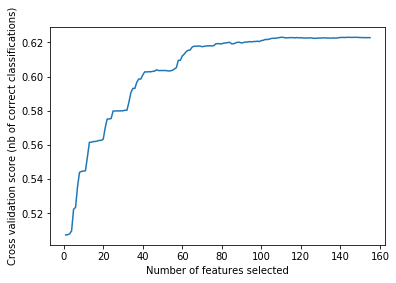

In [177]:
#Recursive Feasture Selection

rfecv = RFECV(estimator=lr, step=5, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(df_resamplex, df_resampley)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [179]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select = 120, step = 5)
rfe = rfe.fit(df_resamplex, df_resampley)
rferanking = zip(df_resamplex.columns, rfe.ranking_)
rferanking = pd.DataFrame(rferanking)
rferanking

,0,1
0,DISTANCE_Standardized,113
1,MONTH_1,110
2,MONTH_10,69
3,MONTH_11,118
4,MONTH_12,109
...,...,...
763,DEP_TIME_BLK_1900-1959,7
764,DEP_TIME_BLK_2000-2059,6
765,DEP_TIME_BLK_2100-2159,9
766,DEP_TIME_BLK_2200-2259,11


In [184]:
rferanking = rferanking.sort_values(by = 1)
rferanking


,0,1
336,ORIGIN_SBP,1
242,ORIGIN_LYH,1
254,ORIGIN_MHK,1
262,ORIGIN_MMH,1
274,ORIGIN_OAJ,1
...,...,...
395,DEST_ABQ,131
506,DEST_EYW,131
502,DEST_EUG,131
636,DEST_OMA,131


In [236]:
rfe_selection_list = list(rferanking[rferanking[1] < 150][0])
df_resamplex_v2 = df_resamplex[rfe_selection_list]


In [237]:
df_resamplex_v2.shape

(164389, 768)

In [226]:
print("The accuracy of cross validation of RandomForest Classifier model is:")
cross_val_score(lr, df_resamplex_v2, df_resampley, cv=3, scoring="accuracy")

The accuracy of cross validation of RandomForest Classifier model is:


array([0.62851981, 0.62397577, 0.62412629])

In [238]:
y_train_pred2 = cross_val_predict(lr, df_resamplex_v2, df_resampley, cv = 3)
conf_mx2 = confusion_matrix(df_resampley, y_train_pred2)
conf_mx2



array([[47297, 33798],
       [27949, 55345]], dtype=int64)

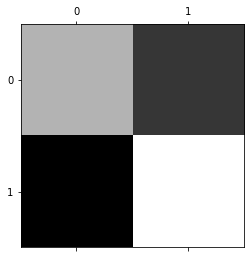

In [239]:
plt.matshow(conf_mx2, cmap=plt.cm.gray) #this matshow function can visualize confusion matrix
plt.show()

In [240]:
y_scores = cross_val_predict(lr, df_resamplex_v2, df_resampley, cv=3, method="decision_function")

In [242]:
from sklearn.metrics import precision_recall_curve 
precisions, recalls, thresholds = precision_recall_curve(df_resampley, y_scores)

In [243]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

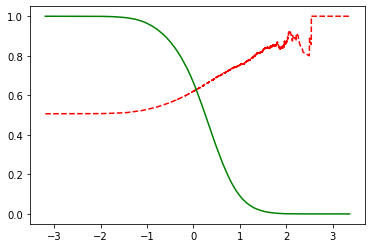

In [244]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [245]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds2 = roc_curve(df_resampley, y_scores)

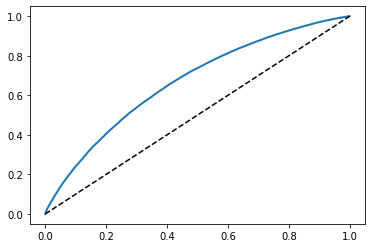

In [246]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    #[...]  Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()